In [299]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw
import numpy as np
import shutil
from loguru import logger
import pandas as pd
from helpers import SplitterHelper
import seaborn as sns


plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('classic')
plt.subplots_adjust(wspace=0, hspace=0)
sns.set()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [298]:
os.listdir('./dataset/lung_colon_image_set')

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

In [249]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'lung_colon_image_set')
dataset_path

'C:\\Users\\abdal\\Documents\\Datasets\\lung-and-colon-cancer-histopathological-images\\dataset\\lung_colon_image_set'

In [227]:
# Grouping dirs and labels
label_path = []
labels = []

for subdir, dirs, files in os.walk(dataset_path):
    for d in dirs:
        label_path.append(os.path.join(dataset_path, d))
        labels.append(d)

In [228]:
labels

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

In [258]:
# create a df, will make things more easier
DATASET = []
for idx, object in enumerate(labels):
            class_path = os.path.join(dataset_path, str(object))
            for img in os.listdir(class_path):
                DATASET.append((object, img))

dataset_df = pd.DataFrame(DATASET, columns=['class', 'filename'])
dataset_df.sample(10)

,class,filename
4122,colon_aca,colonca4709.jpeg
6485,colon_n,colonn2335.jpeg
8022,colon_n,colonn3719.jpeg
7862,colon_n,colonn3575.jpeg
15537,lung_n,lungn1482.jpeg
7663,colon_n,colonn3396.jpeg
4253,colon_aca,colonca4827.jpeg
8422,colon_n,colonn4079.jpeg
19847,lung_n,lungn861.jpeg
24474,lung_scc,lungscc525.jpeg


In [274]:
dataset_df.describe()

,class,filename
count,25000,25000
unique,5,25000
top,colon_aca,colonca1.jpeg
freq,5000,1


In [286]:
for col in labels:
    plt.hist(dataset_df.loc[dataset_df['class'] == col], alpha=0.5)


Error in callback <function flush_figures at 0x00000296461AD630> (for post_execute):


KeyboardInterrupt: 

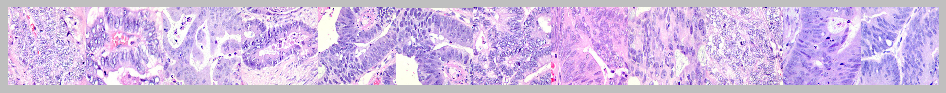

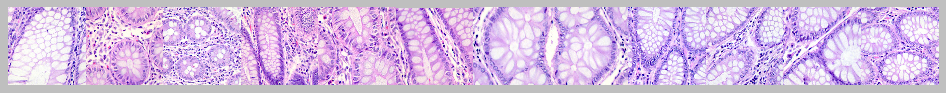

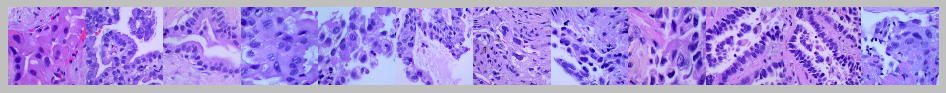

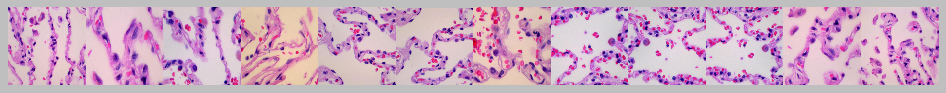

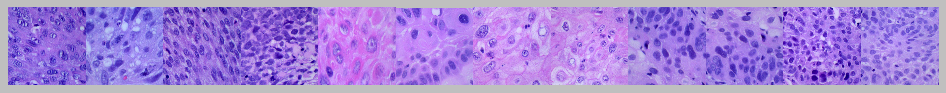

In [277]:
"""
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 6))
plt.subplots_adjust(wspace=0, hspace=0)
for i, j in enumerate(os.listdir(label_path[1])[:90]):
    fname = os.path.join(label_path[1], j)
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    idcol.rectangle(((0, 0), (95, 95)), outline='red')
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(np.array(img))
    fig.suptitle(f'Label {labels[1]}', fontsize=16)
    plt.axis('off')
"""

for idx, lbl in enumerate(labels):
    nrows, ncols = 1, 12
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 6))
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, j in enumerate(os.listdir(label_path[idx])[:ncols]):
        fname = os.path.join(label_path[idx], j)
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0, 0), (1, 12)), outline='green')
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(np.array(img))
#         fig.suptitle(f'Label {lbl}', fontsize=10)
        plt.axis('off')

In [271]:
splitted_dir = r'./dataset/splitted/'

if not os.path.isdir(splitted_dir):
    os.mkdir(splitted_dir)
    

for chunk in ['train', 'val', 'test']:
    for idx, label in enumerate(labels):
        new_dir = os.path.join(splitted_dir, chunk, label)
        if not os.path.isdir(new_dir):
            os.makedirs(new_dir)
            

TRAIN_DIR = os.path.join(splitted_dir, 'train').replace('\\', '/')
VALID_DIR = os.path.join(splitted_dir, 'val').replace('\\', '/')
TEST_DIR = os.path.join(splitted_dir, 'test').replace('\\', '/')

os.path.isdir(TRAIN_DIR)

True

In [273]:
# Copying data to train, test, and val
SplitterHelper(df=dataset_df, classes=labels, DATASET_PATH=dataset_path, TRAIN_DIR=TRAIN_DIR, VALID_DIR=VALID_DIR, TEST_DIR= TEST_DIR)

2022-06-08 14:23:30.815 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class colon_aca
2022-06-08 14:23:33.837 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class colon_aca
2022-06-08 14:23:36.680 | INFO     | helpers:SplitterHelper:45 - Finish Moving 1000 Test Image(s) from class colon_aca
2022-06-08 14:23:45.500 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class colon_n
2022-06-08 14:23:48.387 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class colon_n
2022-06-08 14:23:51.198 | INFO     | helpers:SplitterHelper:45 - Finish Moving 1000 Test Image(s) from class colon_n
2022-06-08 14:23:59.806 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class lung_aca
2022-06-08 14:24:02.706 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class lung_aca
2022-06-08 14:24:05.576 | INFO     